In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import skew

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datamining.csv')

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Fix column data type

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Handle irrelevant data

In [ ]:
data = data.drop('customerID', axis=1)

### Handle Missing Values

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        mode_value = data[col].mode()[0]
        data[col] = data[col].replace('?', mode_value)
    else:  # For numerical variables
        if skew(data[col].dropna()) > 0.5 or skew(data[col].dropna()) < -0.5:
            # Skewed -> Use median
            median_value = data[col].median()
            data[col] = data[col].fillna(median_value)
        else:
            # Not skewed -> Use mean
            mean_value = data[col].mean()
            data[col] = data[col].fillna(mean_value)

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Outliers

In [ ]:
for column in data.select_dtypes(include=['int']):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the nearest bound
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))

###Encode categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0.0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,0.0,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
# Split data into X (features) and y (target variable 'income')
X = data.drop(columns=['Churn'])  # Drop target column for features
y = data['Churn']  # Target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# i. Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
# Descriptive statistics for specific columns
print("Descriptive Statistics")
print(data[['MonthlyCharges', 'TotalCharges', 'tenure']].describe())

Descriptive Statistics
       MonthlyCharges  TotalCharges       tenure
count     7043.000000   7043.000000  7043.000000
mean        64.761692   2281.916928    32.371149
std         30.090047   2265.270398    24.559481
min         18.250000     18.800000     0.000000
25%         35.500000    402.225000     9.000000
50%         70.350000   1397.475000    29.000000
75%         89.850000   3786.600000    55.000000
max        118.750000   8684.800000    72.000000


### Visualizations

<ipython-input-72-b1df6e028d30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=data, palette='coolwarm')


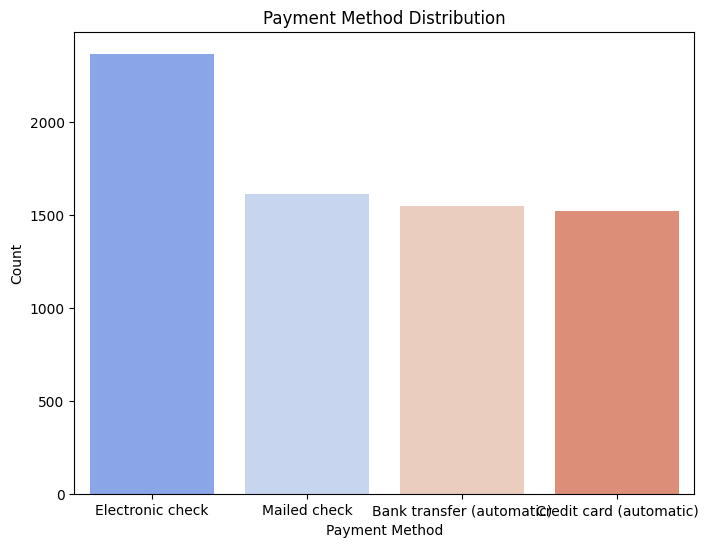

In [ ]:
# Visualize the count of 'PaymentMethod'
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=data, palette='coolwarm')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

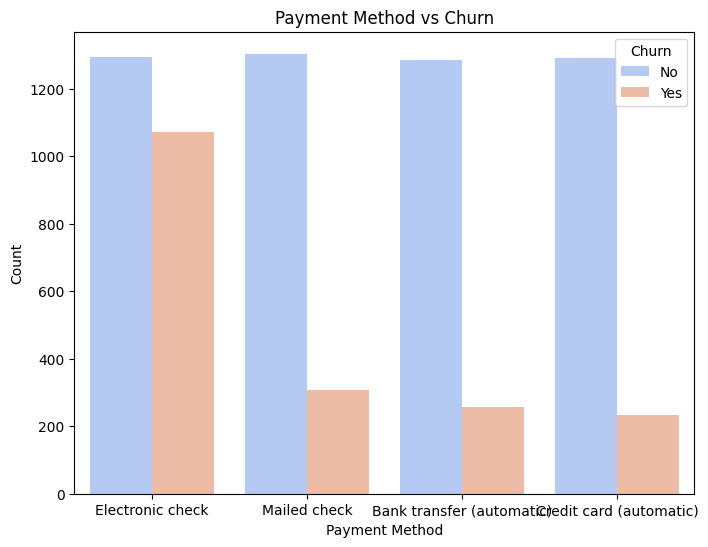

In [ ]:
# Visualize 'PaymentMethod' vs 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='coolwarm')
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

<ipython-input-71-070d26e6851e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='coolwarm')


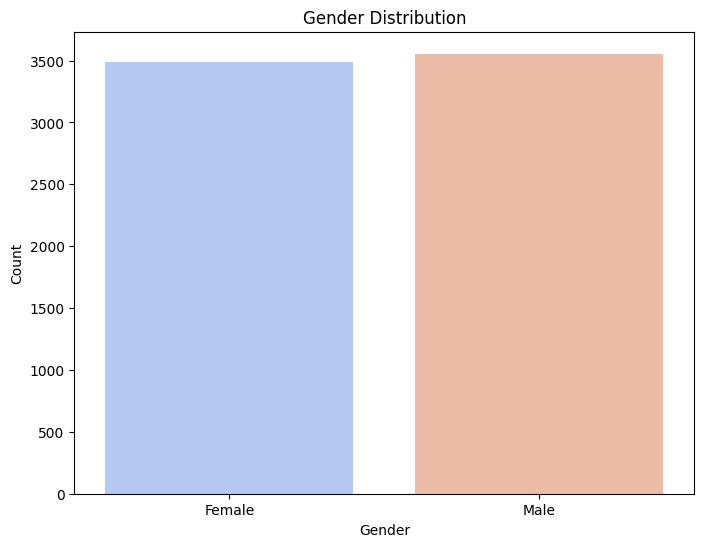

In [ ]:
# Visualize the count of 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-76-0cbfc7015d2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')


Text(0, 0.5, 'Monthly Charges')

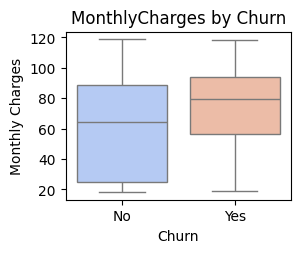

In [ ]:
# Boxplot of MonthlyCharges by Churn
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.boxplot(x='MonthlyCharges', data=data, palette='coolwarm')
plt.title('MonthlyCharges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

<ipython-input-77-194d71ba0943>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalCharges', data=data, palette='coolwarm')


Text(0, 0.5, 'Total Charges')

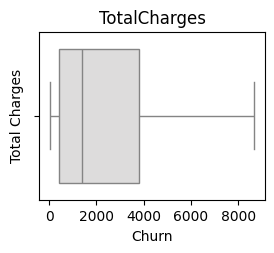

In [ ]:
# Boxplot of TotalCharges by Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='TotalCharges', data=data, palette='coolwarm')
plt.title('TotalCharges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

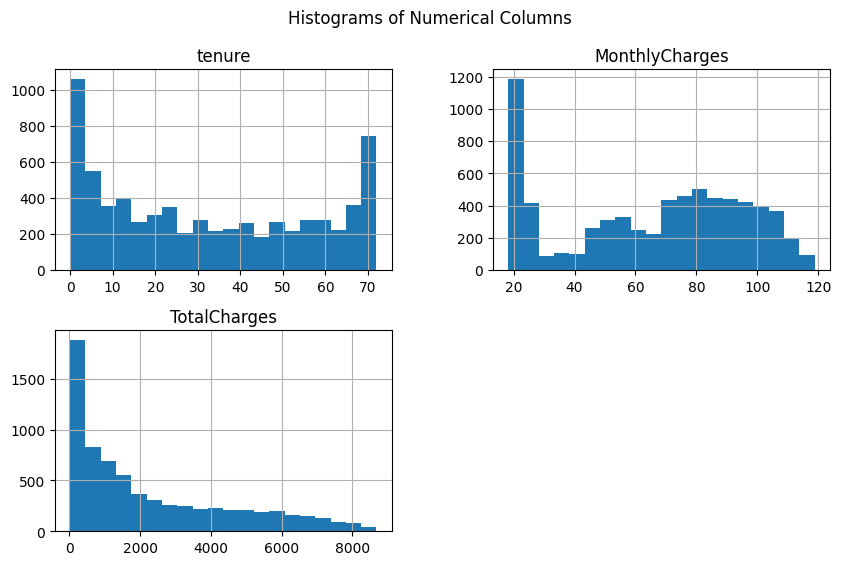

In [ ]:
# Histograms
data[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

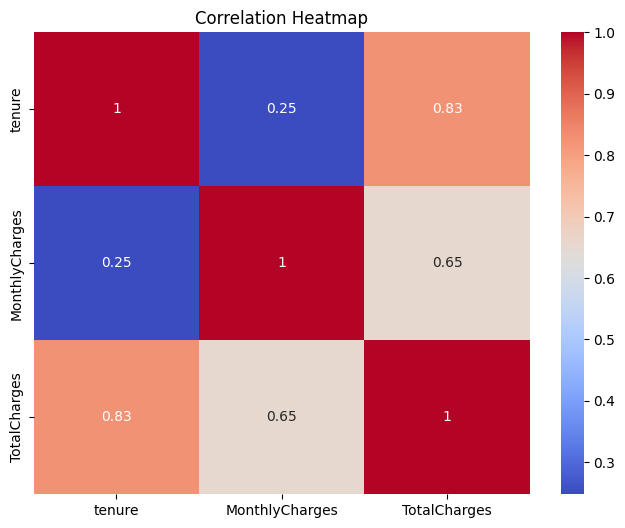

In [ ]:
# Heatmap for correlation matrix
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

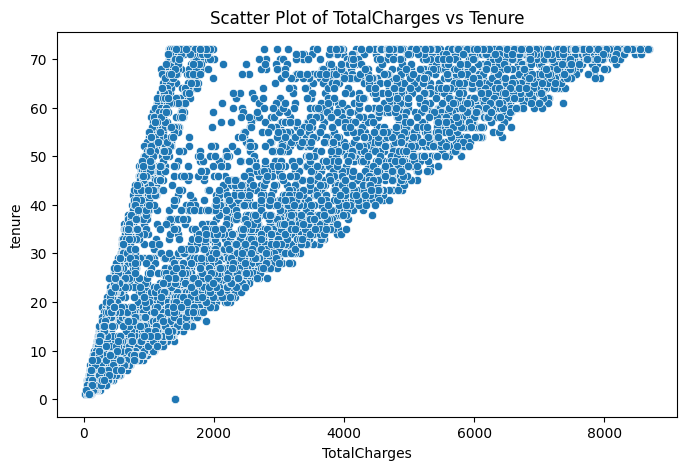

In [ ]:
# Scatter plot of MonthlyCharges vs Tenure
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalCharges', y='tenure', data=data)
plt.title('Scatter Plot of TotalCharges vs Tenure')
plt.show()

In [ ]:
# Chi-squared test for categorical variables
contingency_table = pd.crosstab(data['gender'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test p-value: {p}")

Chi-squared Test p-value: 0.48657873605618596


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (excluding 'Churn' and 'customerID')
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create an empty list to store p-values
p_values = []

# Perform the Chi-squared test for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values.append(p)

# Create a DataFrame to store the results
chi_squared_results = pd.DataFrame({
    'Column': categorical_columns,
    'P-Value': p_values
})

# Sort the p-values in ascending order
chi_squared_results = chi_squared_results.sort_values(by='P-Value')

# Print the results
print(chi_squared_results)


              Column        P-Value
13          Contract  5.863038e-258
7     OnlineSecurity  2.661150e-185
10       TechSupport  1.443084e-180
6    InternetService  9.571788e-160
15     PaymentMethod  3.682355e-140
8       OnlineBackup  2.079759e-131
9   DeviceProtection  5.505219e-122
12   StreamingMovies   2.667757e-82
11       StreamingTV   5.528994e-82
14  PaperlessBilling   4.073355e-58
3         Dependents   4.924922e-43
2            Partner   2.139911e-36
5      MultipleLines   3.464383e-03
4       PhoneService   3.387825e-01
0             gender   4.865787e-01
1      SeniorCitizen   1.000000e+00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              Column        P-Value
13          Contract  5.863038e-258
7     OnlineSecurity  2.661150e-185
10       TechSupport  1.443084e-180
6    InternetService  9.571788e-160
15     PaymentMethod  3.682355e-140
8       OnlineBackup  2.079759e-131
9   DeviceProtection  5.505219e-122
12   StreamingMovies   2.667757e-82
11       StreamingTV   5.528994e-82
14  PaperlessBilling   4.073355e-58
3         Dependents   4.924922e-43
1      SeniorCitizen   1.510067e-36
2            Partner   2.139911e-36
5      MultipleLines   3.464383e-03
4       PhoneService   3.387825e-01
0             gender   4.865787e-01


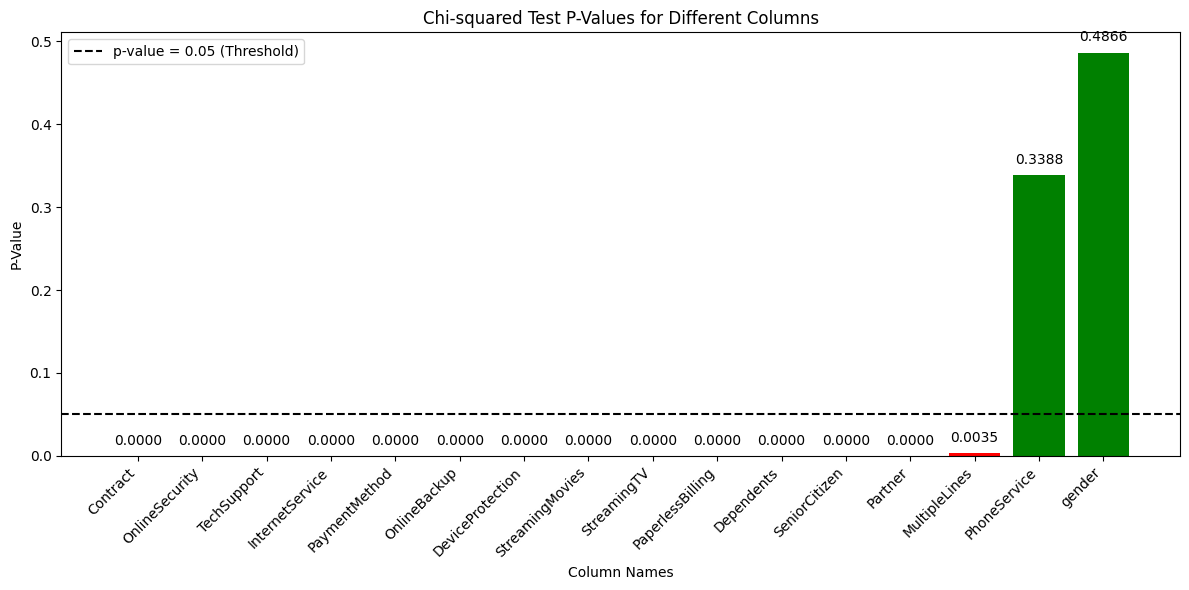

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (excluding 'Churn' and 'customerID')
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create an empty list to store p-values
p_values = []

# Perform the Chi-squared test for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values.append(p)

# Create a DataFrame to store the results
chi_squared_results = pd.DataFrame({
    'Column': categorical_columns,
    'P-Value': p_values
})

# Sort the p-values in ascending order
chi_squared_results = chi_squared_results.sort_values(by='P-Value')

# Print the results
print(chi_squared_results)

# Function to plot p-value bar chart
def plot_p_value_bar_chart(chi_squared_results):
    # Extract the p-values and column names
    p_values = chi_squared_results['P-Value']
    column_names = chi_squared_results['Column']

    # Set up the colors based on p-value (red if p-value < 0.05, green otherwise)
    colors = ['red' if p < 0.05 else 'green' for p in p_values]

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(column_names, p_values, color=colors)

    # Add labels and title
    plt.title('Chi-squared Test P-Values for Different Columns')
    plt.xlabel('Column Names')
    plt.ylabel('P-Value')
    plt.axhline(y=0.05, color='black', linestyle='--', label='p-value = 0.05 (Threshold)')

    # Add the p-value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

    # Show legend and plot
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotate column names for better readability
    plt.tight_layout()  # Ensure everything fits within the plot area
    plt.show()

# Call the function to generate the bar chart
plot_p_value_bar_chart(chi_squared_results)

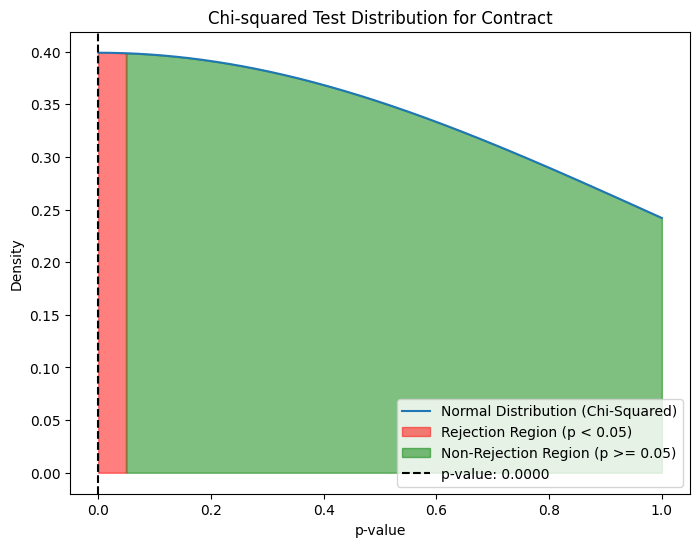

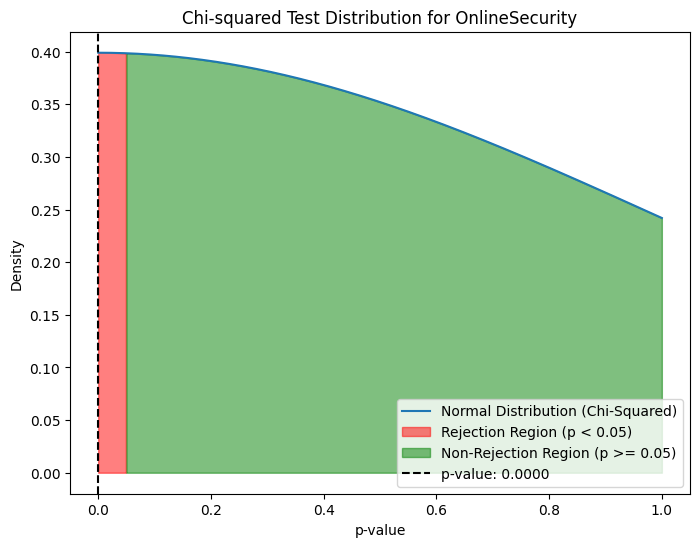

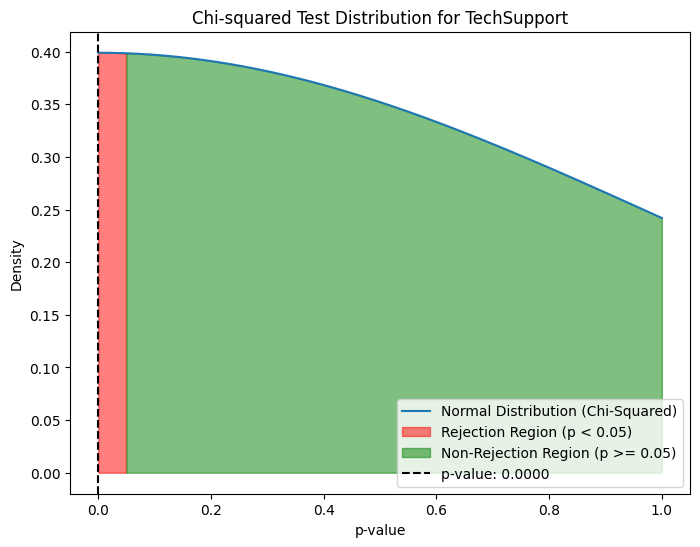

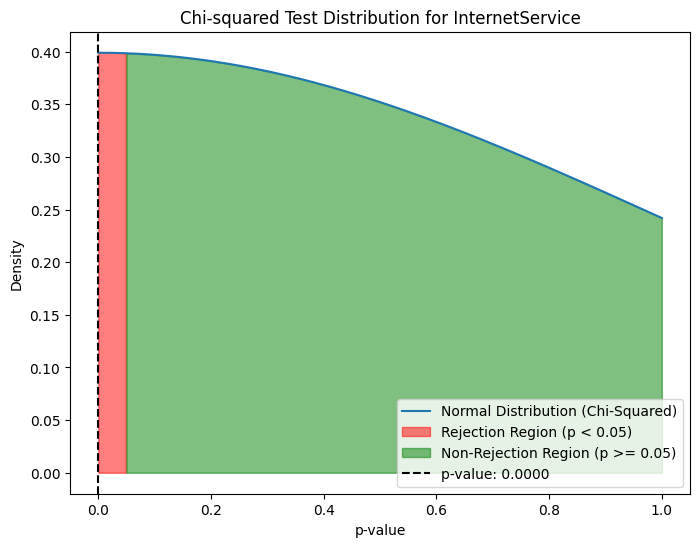

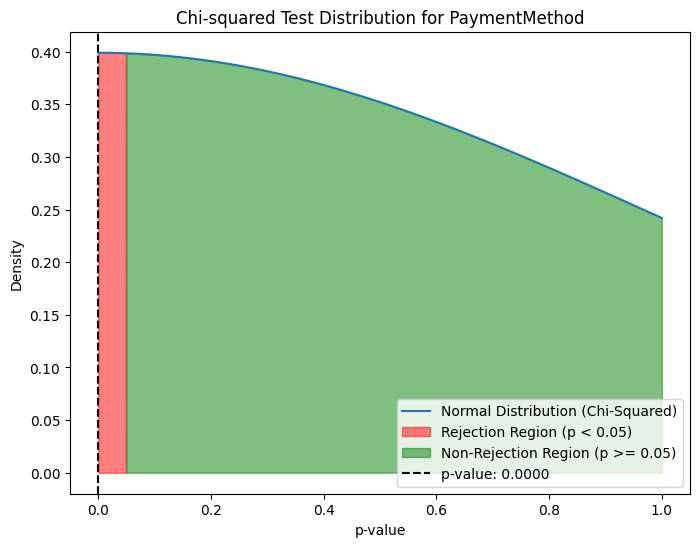

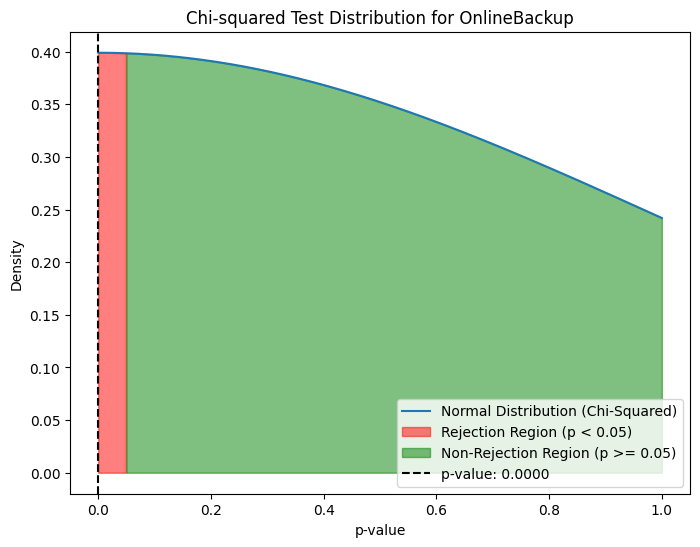

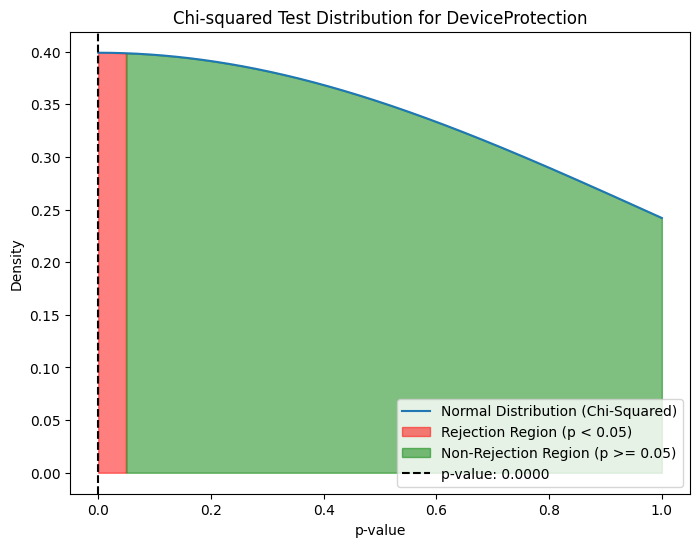

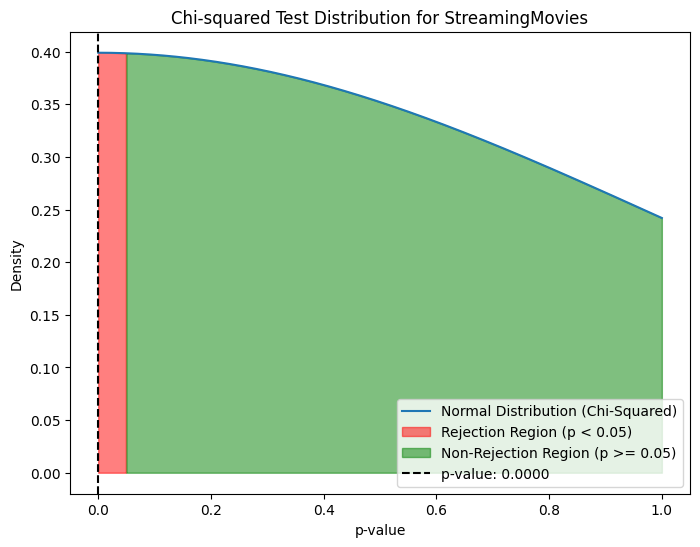

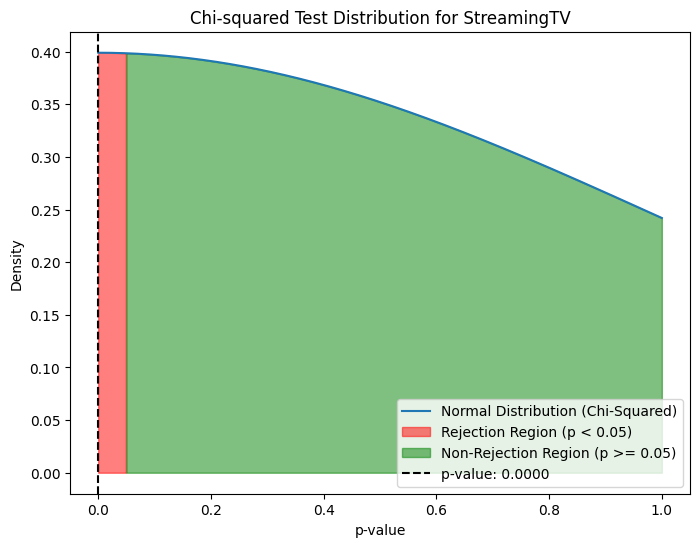

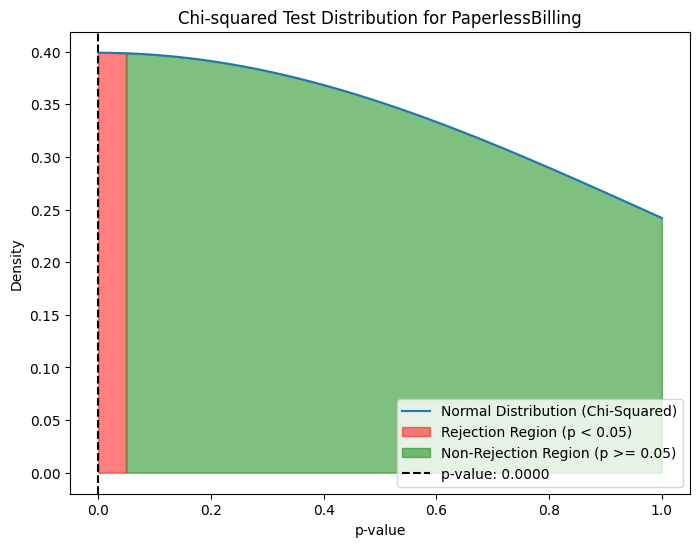

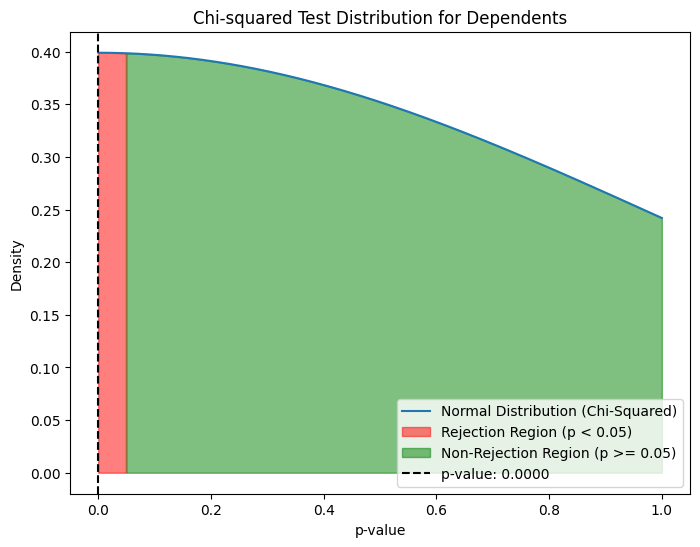

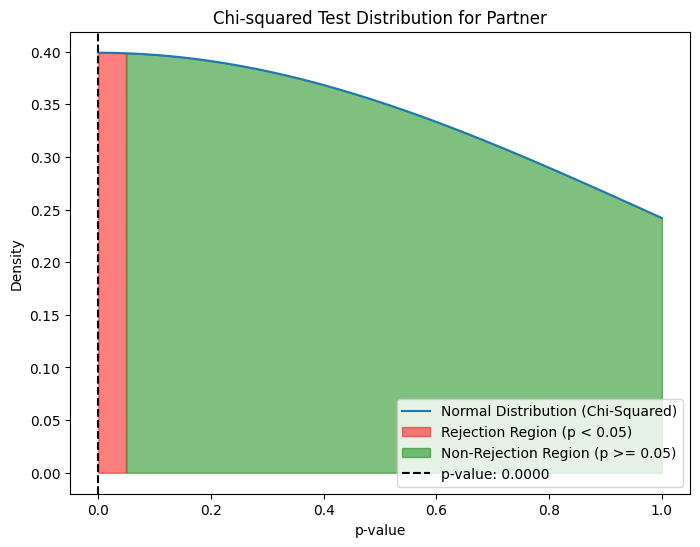

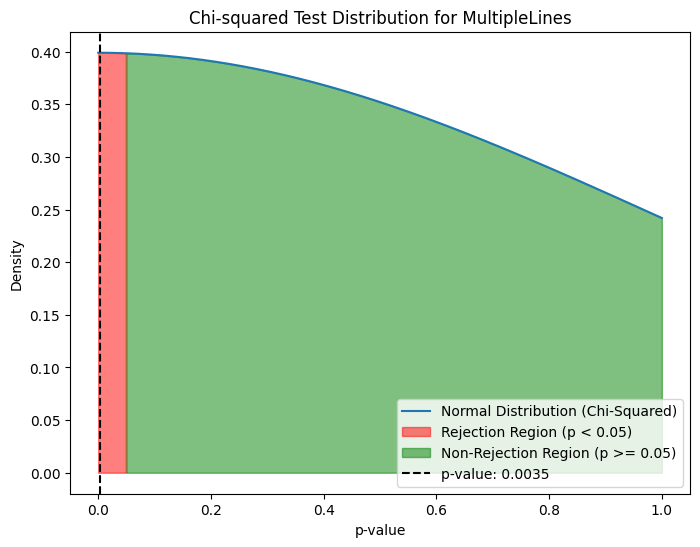

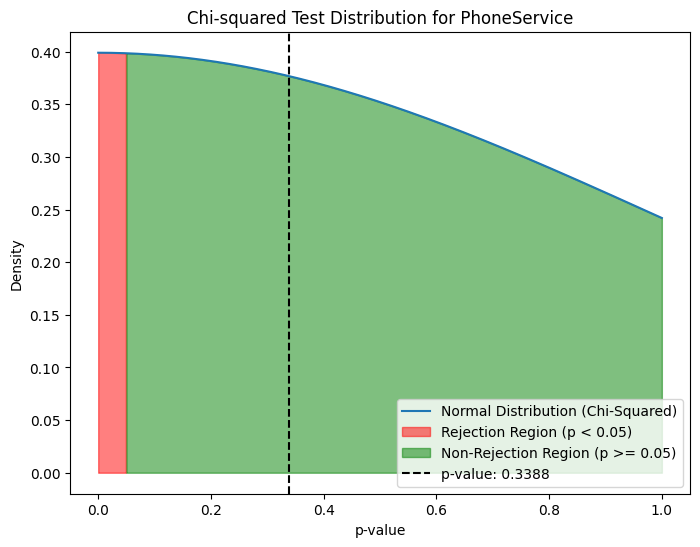

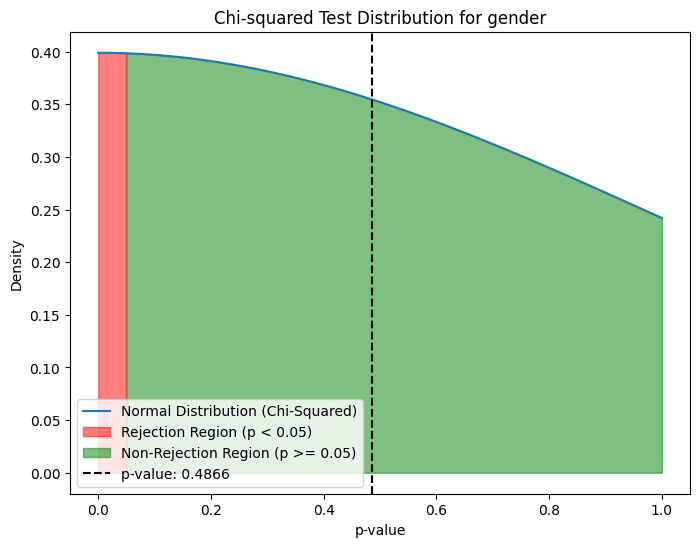

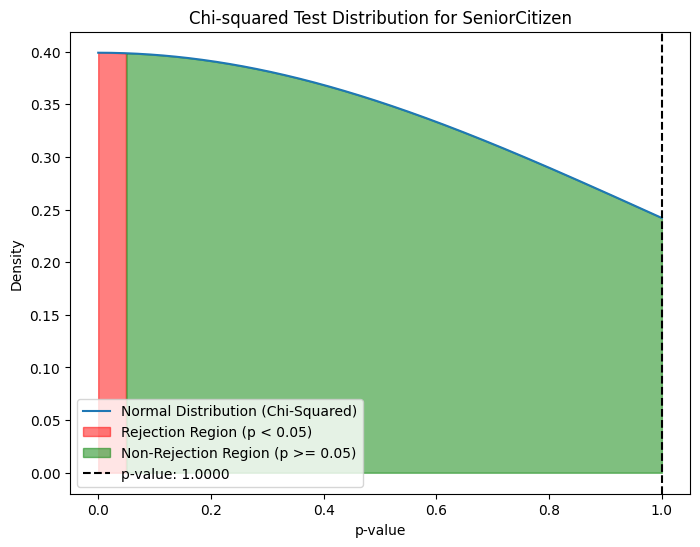

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot normal distribution and shade regions based on p-values
def plot_p_value_distribution(p_value, column_name):
    # Define the x range for plotting the normal distribution
    x = np.linspace(0, 1, 1000)

    # Create the normal distribution (standard normal distribution with mean=0, std=1)
    y = stats.norm.pdf(x, 0, 1)

    # Plot the normal distribution
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Normal Distribution (Chi-Squared)")

    # Shade the rejection region (p-value < 0.05)
    plt.fill_between(x, 0, y, where=(x < 0.05), color='red', alpha=0.5, label='Rejection Region (p < 0.05)')

    # Shade the non-rejection region (p-value >= 0.05)
    plt.fill_between(x, 0, y, where=(x >= 0.05), color='green', alpha=0.5, label='Non-Rejection Region (p >= 0.05)')

    # Plot the p-value as a vertical line
    plt.axvline(x=p_value, color='black', linestyle='--', label=f'p-value: {p_value:.4f}')

    # Title and labels
    plt.title(f'Chi-squared Test Distribution for {column_name}')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.legend()

    # Show plot
    plt.show()

# Iterate through the Chi-squared results and plot for each column
for index, row in chi_squared_results.iterrows():
    plot_p_value_distribution(row['P-Value'], row['Column'])

### Datamining Techniques

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-8c5c00b8ae91>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(numeric_data.mean(), inplace=True)


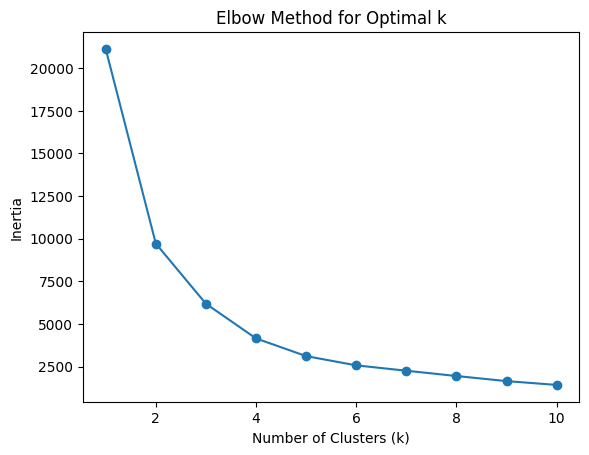

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset (Make sure to replace with your correct file path)
data = pd.read_csv('/content/drive/MyDrive/datamining.csv')

# Convert columns to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Select the numerical columns for clustering
numeric_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Fill NaN values with the mean of the column (this step can be adjusted based on your needs)
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Standardizing the data (important for K-means clustering)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Checking for k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster Centers (in standardized scale):
[[-0.7779212   0.34272659 -0.54989991]
 [ 1.0669193   0.82793184  1.30811675]
 [-0.12131006 -1.26673939 -0.64915631]]
Cluster Centers in Original Scale:
      tenure  MonthlyCharges  TotalCharges
0  13.265808       75.074352   1037.777004
1  58.574133       89.674200   5246.185214
2  29.391837       26.645445    812.961241


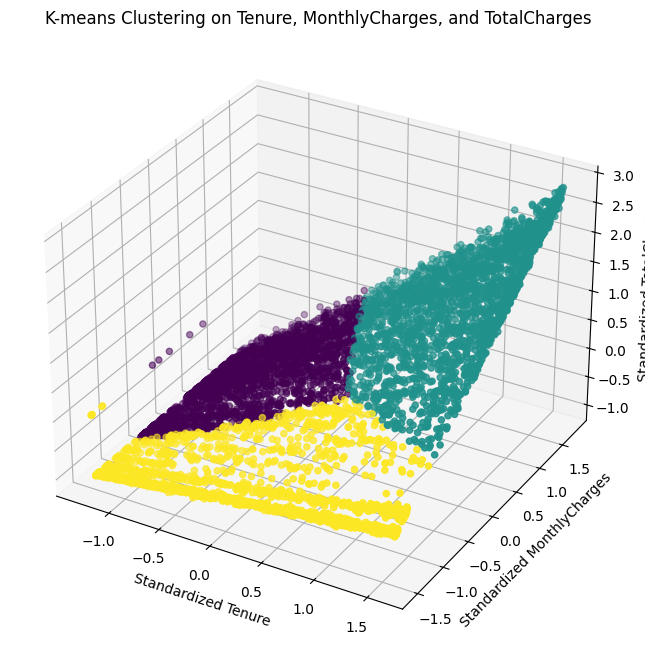


Mean of features in each cluster:
            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        13.256994       75.039276   1034.223038
1        58.559291       89.680032   5245.050704
2        29.411846       26.631444    809.388051


In [ ]:
# Apply K-means with the optimal number of clusters (let's assume k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_data_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Print the cluster centers (in standardized scale)
print("Cluster Centers (in standardized scale):")
print(kmeans.cluster_centers_)

# Reverse standardization of cluster centers to get them in the original scale
# Reverse standardization for each cluster center
cluster_centers_original_scale = []
for i in range(kmeans.cluster_centers_.shape[0]):  # Iterate through each cluster center
    center = kmeans.cluster_centers_[i, :]  # Get the i-th cluster center
    original_center = center * numeric_data.std() + numeric_data.mean()  # Reverse the standardization
    cluster_centers_original_scale.append(original_center)

# Convert the list of cluster centers back to a DataFrame for easier viewing
cluster_centers_original_scale = pd.DataFrame(cluster_centers_original_scale, columns=numeric_data.columns)

# Print the cluster centers in the original scale
print("Cluster Centers in Original Scale:")
print(cluster_centers_original_scale)

# Visualize the clusters (3D scatter plot)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters in 3D
ax.scatter(numeric_data_scaled[:, 0], numeric_data_scaled[:, 1], numeric_data_scaled[:, 2], c=data['Cluster'], cmap='viridis')

# Labels for the axes
ax.set_xlabel('Standardized Tenure')
ax.set_ylabel('Standardized MonthlyCharges')
ax.set_zlabel('Standardized TotalCharges')

# Title for the plot
plt.title('K-means Clustering on Tenure, MonthlyCharges, and TotalCharges')
plt.show()

# Optional: Group by clusters and check the mean of each feature in each cluster
cluster_means = data.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print("\nMean of features in each cluster:")
print(cluster_means)

### Making association rule

In [ ]:
!pip install --upgrade mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Preprocessing (convert categorical columns into one-hot encoding)
categorical_cols = ['InternetService', 'PaymentMethod', 'OnlineSecurity', 'StreamingMovies']  # Select relevant categorical columns
data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)

# Step 2: Apply Apriori to generate frequent itemsets
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)  # Minimum support is 5%
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.439585                      (InternetService_Fiber optic)
1   0.216669                               (InternetService_No)
2   0.216101            (PaymentMethod_Credit card (automatic))
3   0.335794                   (PaymentMethod_Electronic check)
4   0.228880                       (PaymentMethod_Mailed check)
5   0.216669               (OnlineSecurity_No internet service)
6   0.286668                               (OnlineSecurity_Yes)
7   0.216669              (StreamingMovies_No internet service)
8   0.387903                              (StreamingMovies_Yes)
9   0.084765  (InternetService_Fiber optic, PaymentMethod_Cr...
10  0.226466  (InternetService_Fiber optic, PaymentMethod_El...
11  0.119125  (InternetService_Fiber optic, OnlineSecurity_Yes)
12  0.248616  (InternetService_Fiber optic, StreamingMovies_...
13  0.105211   (InternetService_No, PaymentMethod_Mailed check)
14  0.216669  (Intern

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Number of itemsets
num_itemsets = len(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)
print("Association Rules:")
print(rules)

Association Rules:
                                          antecedents  \
0                       (InternetService_Fiber optic)   
1                    (PaymentMethod_Electronic check)   
2                       (InternetService_Fiber optic)   
3                               (StreamingMovies_Yes)   
4                                (InternetService_No)   
..                                                ...   
73  (StreamingMovies_No internet service, PaymentM...   
74               (OnlineSecurity_No internet service)   
75                               (InternetService_No)   
76              (StreamingMovies_No internet service)   
77                       (PaymentMethod_Mailed check)   

                                          consequents  antecedent support  \
0                    (PaymentMethod_Electronic check)            0.439585   
1                       (InternetService_Fiber optic)            0.335794   
2                               (StreamingMovies_Yes)            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 4: Sort rules by confidence and lift (for better interpretation)
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
print("\nTop Rules (sorted by confidence and lift):")
print(sorted_rules)


Top Rules (sorted by confidence and lift):
                              antecedents  \
6                    (InternetService_No)   
7    (OnlineSecurity_No internet service)   
8                    (InternetService_No)   
9   (StreamingMovies_No internet service)   
20   (OnlineSecurity_No internet service)   
..                                    ...   
13                  (StreamingMovies_Yes)   
39                  (StreamingMovies_Yes)   
37          (InternetService_Fiber optic)   
27                  (StreamingMovies_Yes)   
26          (InternetService_Fiber optic)   

                                          consequents  antecedent support  \
6                (OnlineSecurity_No internet service)            0.216669   
7                                (InternetService_No)            0.216669   
8               (StreamingMovies_No internet service)            0.216669   
9                                (InternetService_No)            0.216669   
20              (StreamingMovi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


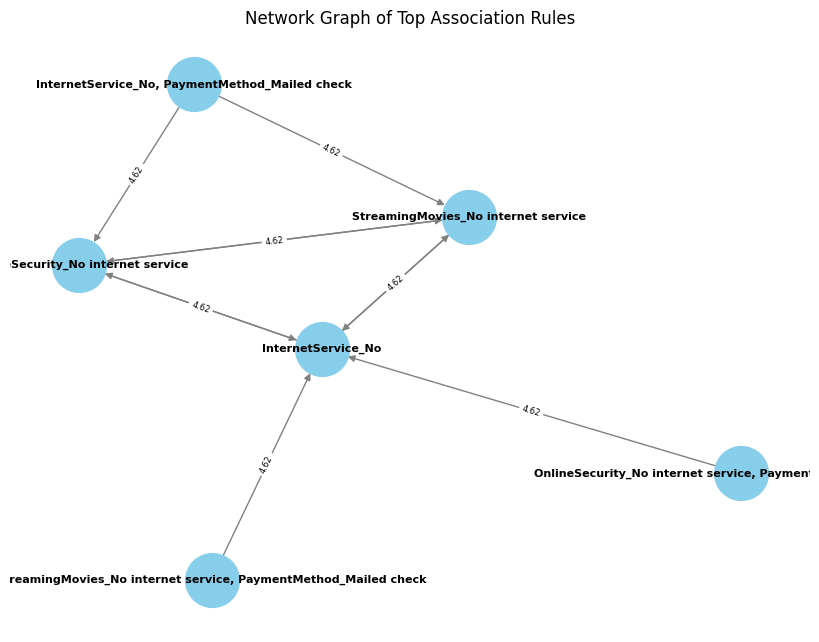

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.DiGraph()

# Add edges for the top 10 rules
for _, row in sorted_rules.nlargest(10, 'lift').iterrows():
    G.add_edge(', '.join(list(row['antecedents'])), ', '.join(list(row['consequents'])), weight=row['lift'])

# Draw the graph
plt.figure(figsize=(8, 6))  # Reduce figure size
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1500,  # Reduce node size
    node_color='skyblue',
    font_size=8,  # Reduce font size
    font_weight='bold',
    edge_color='gray'
)

# Add edge labels for lift
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()}, font_size=6  # Smaller font for edge labels
)

plt.title('Network Graph of Top Association Rules', fontsize=12)  # Smaller title font size
plt.show()

### making classfication models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Step 1: Preprocessing


# Drop non-informative columns (e.g., 'customerID')
# data = data.drop(columns=['customerID'])

# Convert 'TotalCharges' to numeric (handle errors by coercing invalid entries to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Encode categorical columns using LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    if col != 'Churn':  # Skip the target variable for now
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Encode the target variable ('Churn')
le_churn = LabelEncoder()
data['Churn'] = le_churn.fit_transform(data['Churn'])  # 'No' -> 0, 'Yes' -> 1

# Standardize numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 2: Train-Test Split
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-994d8fc4b4e4>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [ ]:
# Step 3: Model Training and Evaluation

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, dt_preds))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
# Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)
print("Neural Network Performance:")
print(classification_report(y_test, nn_preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neural Network Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

